## Import

In [1]:
import warnings
warnings.filterwarnings("ignore")

import folium
import numpy as np
import pandas as pd
import seaborn as sns
from functions import *
from folium import plugins
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR, SVR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

## Load the Data

In [2]:
# Load the dataset
life_expectancy_df = pd.read_csv('Data/Life Expectancy Data.csv')

In [3]:
# Show the dataset
life_expectancy_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# Describe the dataset
life_expectancy_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
# Get the total number of countries
print('In this dataset, {} countries are represented'.format(np.unique(life_expectancy_df['Country'].values).size))

In this dataset, 193 countries are represented


In [6]:
# Get the name of the columns
life_expectancy_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## Clean the dataset

### Rename columns properly

First of all, we can see from the list above that some column's name are bad written. We start by correcting it.

In [7]:
# Rename the columns that contains extra spaces
life_expectancy_df = life_expectancy_df.rename(index=str, columns={"Life expectancy ": "Life expectancy",
                                                                   "Measles ": "Measles",
                                                                   " BMI ": "BMI",
                                                                   "under-five deaths ": "under-five deaths",
                                                                   "Diphtheria ": "Diphtheria",
                                                                   " HIV/AIDS": "HIV/AIDS",
                                                                   " thinness  1-19 years": "thinness 1-19 years",
                                                                   " thinness 5-9 years": "thinness 5-9 years"})

### Get rid of NaN values

We first check for the NaN values that we can drop. Here are the columns that contains NaN values.

In [8]:
# Get the columns that contain NaN values
get_nan_columns(life_expectancy_df)

,name,hasnan,number,number country
3,Life expectancy,True,10,10
4,Adult Mortality,True,10,10
6,Alcohol,True,194,178
8,Hepatitis B,True,553,98
10,BMI,True,34,4
12,Polio,True,19,3
13,Total expenditure,True,226,181
14,Diphtheria,True,19,3
16,GDP,True,448,38
17,Population,True,652,49


We can see that for some features, there is a lot of missing values. To deal with this, we build an averaged dataset where for a given country, we average the rows over the years.

In [9]:
# For each country we average the values over the years
life_expectancy_df_av = life_expectancy_df.groupby(['Country']).mean().drop('Year', axis=1)
# Add back the column 'Status' that has been deleted by the groupby function
life_expectancy_df_av['Status'] = life_expectancy_df[life_expectancy_df['Year'] == 2015].set_index('Country')[['Status']]
# We one hot encode the column 'Status' and rename columns
life_expectancy_df_av = pd.get_dummies(life_expectancy_df_av)
life_expectancy_df_av.rename(columns={'Status_Developed':'Developed',
                                      'Status_Developing': 'Developing'}, inplace=True)
# Show the result
life_expectancy_df_av.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,...,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0,1
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,...,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0,1
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,...,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0,1
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,...,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0,1
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,...,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,0,1


We now check for the observations that still contain NaN values and see how we could deal with it.

In [10]:
# Get the columns that still contain NaN values
get_nan_columns(life_expectancy_df_av, country_indexed=True)

,name,hasnan,number,number country
0,Life expectancy,True,10,10
1,Adult Mortality,True,10,10
3,Alcohol,True,2,2
5,Hepatitis B,True,9,9
7,BMI,True,4,4
10,Total expenditure,True,2,2
13,GDP,True,30,30
14,Population,True,48,48
15,thinness 1-19 years,True,4,4
16,thinness 5-9 years,True,4,4


#### Life expectancy

We start with 'Life expectancy'. We can see that for most of them, they are Island. So we can drop this observations since they won't be that relevant for the rest of the analysis. For Monaco and San Marino, we replace the missing values by those of France and Italia.

In [11]:
# Get the countries for which 'Life expectancy' is a NaN value
le_nan = life_expectancy_df_av.loc[life_expectancy_df_av['Life expectancy'].isna()].index
le_nan

Index(['Cook Islands', 'Dominica', 'Marshall Islands', 'Monaco', 'Nauru',
       'Niue', 'Palau', 'Saint Kitts and Nevis', 'San Marino', 'Tuvalu'],
      dtype='object', name='Country')

In [12]:
# Update the list of countries to drop
le_drop = le_nan.drop(['Monaco', 'San Marino'])
# Drop those countries
life_expectancy_df_av = life_expectancy_df_av.drop(le_drop)
# Replace the remaining NaN values
life_expectancy_df_av.at['Monaco', 'Life expectancy'] = life_expectancy_df_av.loc['France']['Life expectancy']
life_expectancy_df_av.at['San Marino', 'Life expectancy'] = life_expectancy_df_av.loc['Italy']['Life expectancy']

#### Adult Mortality

We do the same for 'Adult Mortality', and apply the same reasonning as above for Monaca and San Marino.

In [13]:
# Get the countries for which 'Adult Mortality' is a NaN value
am_nan = life_expectancy_df_av.loc[life_expectancy_df_av['Adult Mortality'].isna()].index
am_nan

Index(['Monaco', 'San Marino'], dtype='object', name='Country')

In [14]:
# Replace the remaining NaN values
life_expectancy_df_av.at['Monaco', 'Adult Mortality'] = life_expectancy_df_av.loc['France']['Adult Mortality']
life_expectancy_df_av.at['San Marino', 'Adult Mortality'] = life_expectancy_df_av.loc['Italy']['Adult Mortality']

#### Alcohol

For 'Alcohol' we only have Souht Sudan that does not have any valid value. Thus we replace the value by the one of the following article (http://hotinjuba.com/ranks-south-sudan-drunkest-country-africa/) which is about 11L.

In [15]:
# Get the countries for which 'Alcohol' is a NaN value
alc_nan = life_expectancy_df_av.loc[life_expectancy_df_av['Alcohol'].isna()].index
alc_nan

Index(['South Sudan'], dtype='object', name='Country')

In [16]:
# Replace the NaN value
life_expectancy_df_av.at['South Sudan', 'Alcohol'] = 11

#### Hepatitis B

Little research tells us that Denmark, Finland, Iceland, Norway, Sweden and United Kingdom do not deal with hepatitis B as it is a very limited public health problem. We will then replace the Nan value with a tenth of the minimum value (we will do the same for Switzerland). For Japan and Slovania we will put in the average value.

In [17]:
# Get the countries for which 'Hepatitis B' is a NaN value
hb_nan = life_expectancy_df_av.loc[life_expectancy_df_av['Hepatitis B'].isna()].index
hb_nan

Index(['Denmark', 'Finland', 'Hungary', 'Iceland', 'Japan', 'Norway',
       'Slovenia', 'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland'],
      dtype='object', name='Country')

In [18]:
# Define the average and the minimum of 'Hepatitis B'
mean_hepatitis_B = np.mean(life_expectancy_df_av['Hepatitis B'])
min_hepatitis_B = np.min(life_expectancy_df_av['Hepatitis B'])

In [19]:
# Define dictionaries to replace NaN values
value_min = {'Hepatitis B': min_hepatitis_B/10}
value_mean = {'Hepatitis B': mean_hepatitis_B}
# Define list of countries where NaN values have to be replaced
coutries_min = ['Denmark', 'Finland', 'Hungary', 'Iceland', 'Norway', 'Switzerland',
                'United Kingdom of Great Britain and Northern Ireland']
coutries_mean = ['Japan', 'Slovenia']
life_expectancy_df_av.loc[coutries_min] = life_expectancy_df_av.loc[coutries_min].fillna(value=value_min)
life_expectancy_df_av.loc[coutries_mean] = life_expectancy_df_av.loc[coutries_mean].fillna(value=value_mean)

#### BMI

For 'BMI' of Sudan and South Sudan, we modify the two NaN values of BMI accoding to the value found here: http://gamapserver.who.int/gho/interactive_charts/ncd/risk_factors/bmi/atlas.html, and for 'BMI' of Monaco and San Marino, we replace them by the values of France and Italy respectively.

In [20]:
# Get the countries for which 'BMI' is a NaN value
bmi_nan = life_expectancy_df_av.loc[life_expectancy_df_av['BMI'].isna()].index
bmi_nan

Index(['Monaco', 'San Marino', 'South Sudan', 'Sudan'], dtype='object', name='Country')

In [21]:
# Replace the NaN values
life_expectancy_df_av.at['Monaco', 'BMI'] = life_expectancy_df_av.loc['France']['BMI']
life_expectancy_df_av.at['San Marino', 'BMI'] = life_expectancy_df_av.loc['Italy']['BMI']
life_expectancy_df_av.at['South Sudan', 'BMI'] = 24.7
life_expectancy_df_av.at['Sudan', 'BMI'] = 24.7

#### Total expenditure

For the 'Total expenditure' NaN value of Somalia we replace it with 2.7 (https://www.who.int/whr/2004/annex/country/som/en/). Some research (https://www.refworld.org/pdfid/4c3ead302.pdf) tell us that for North Korea it is one of the lowest on earth. We will therefore put the minimum value divided by two, we consider it is a good approximation.

In [22]:
# Get the countries for which 'Total expenditure' is a NaN value
te_nan = life_expectancy_df_av.loc[life_expectancy_df_av['Total expenditure'].isna()].index
te_nan

Index(['Democratic People's Republic of Korea', 'Somalia'], dtype='object', name='Country')

In [23]:
# Define the minimum expenditure divided by 2
min_expenditure = np.min(life_expectancy_df_av['Total expenditure'])/2
# Replace de NaN values
life_expectancy_df_av.at['Somalia', 'Total expenditure'] = 2.7
life_expectancy_df_av.at['Democratic People\'s Republic of Korea', 'Total expenditure'] = min_expenditure

#### GDP

We have 27 missing values for the GDP, we easily search those values and replace them.

In [24]:
# Get the countries for which 'GDP' is a NaN value
gdp_nan = life_expectancy_df_av.loc[life_expectancy_df_av['GDP'].isna()].index
gdp_nan

Index(['Bahamas', 'Bolivia (Plurinational State of)', 'Congo', 'Czechia',
       'Côte d'Ivoire', 'Democratic People's Republic of Korea',
       'Democratic Republic of the Congo', 'Egypt', 'Gambia',
       'Iran (Islamic Republic of)', 'Kyrgyzstan',
       'Lao People's Democratic Republic', 'Micronesia (Federated States of)',
       'Monaco', 'Republic of Korea', 'Republic of Moldova', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'San Marino', 'Slovakia',
       'The former Yugoslav republic of Macedonia',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen'],
      dtype='object', name='Country')

In [25]:
# Replace the NaN values
gdp_values = [25100, 7500, 6700, 35200, 3900, 1700, 800, 13000, 1700, 20000, 3700, 7400, 3400, 115700,
              39400, 5700, 13500, 11600, 59500, 32900, 15200, 43600, 3300, 59500, 12400, 6900, 2300]
life_expectancy_df_av.at[gdp_nan, 'GDP'] = gdp_values

#### Population

For 'Population' NaN values, we complete easily those values with https://www.populationdata.net/palmares/population/#Antigua-et-Barbuda

In [26]:
# Get the countries for which 'Population' is a NaN value
pop_nan = life_expectancy_df_av.loc[life_expectancy_df_av['Population'].isna()].index
pop_nan

Index(['Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados',
       'Bolivia (Plurinational State of)', 'Brunei Darussalam', 'Congo',
       'Cuba', 'Czechia', 'Côte d'Ivoire',
       'Democratic People's Republic of Korea',
       'Democratic Republic of the Congo', 'Egypt', 'Gambia', 'Grenada',
       'Iran (Islamic Republic of)', 'Kuwait', 'Kyrgyzstan',
       'Lao People's Democratic Republic', 'Libya',
       'Micronesia (Federated States of)', 'Monaco', 'New Zealand', 'Oman',
       'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'San Marino', 'Saudi Arabia',
       'Singapore', 'Slovakia', 'Somalia',
       'The former Yugoslav republic of Macedonia', 'United Arab Emirates',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen'],
      dtype='object', name='Country')

In [27]:
# Replace the NaN values
pop_values = [104084, 403095, 1637896, 287010, 11379861, 439336, 5542197, 11492046, 10630589, 25531083, 25727408,
              86727573, 101168745, 2228075, 108825, 82820766, 4248974, 6218616, 7064242, 6569864, 106983, 39102,
              4792409, 5001875, 2743901, 51339238, 4029750, 180454, 110488, 33683, 34140662, 5868104, 5450987,
              15636171, 2086720, 9682088, 66959016, 60913557, 329093110, 32779868, 97429061, 29579986] 
life_expectancy_df_av.at[pop_nan, 'Population'] = pop_values

#### Thinness

We have four NaN values for thinness. To replace those of Sudan and South Sudan we use the following article to fill them (also for thinness 1-19): https://academic.oup.com/tropej/article/61/4/260/1633520. And to replace those of Monaco and San Marino, we use the same reasoning as above by taking the values of France and Italy respectively.

In [28]:
# Get the countries for which 'thinness 5-9 years' is a NaN value
th1_nan = life_expectancy_df_av.loc[life_expectancy_df_av['thinness 5-9 years'].isna()].index
th1_nan

Index(['Monaco', 'San Marino', 'South Sudan', 'Sudan'], dtype='object', name='Country')

In [29]:
# Replace the values
life_expectancy_df_av.at['Monaco', 'thinness 5-9 years'] = life_expectancy_df_av.loc['France']['thinness 5-9 years']
life_expectancy_df_av.at['San Marino', 'thinness 5-9 years'] = life_expectancy_df_av.loc['Italy']['thinness 5-9 years']
life_expectancy_df_av.at['South Sudan', 'thinness 5-9 years'] = 21.6
life_expectancy_df_av.at['Sudan', 'thinness 5-9 years'] = 21.6

In [30]:
# Get the countries for which 'thinness 5-9 years' is a NaN value
th2_nan = life_expectancy_df_av.loc[life_expectancy_df_av['thinness 1-19 years'].isna()].index
th2_nan

Index(['Monaco', 'San Marino', 'South Sudan', 'Sudan'], dtype='object', name='Country')

In [31]:
# Replace the values
life_expectancy_df_av.at['Monaco', 'thinness 1-19 years'] = life_expectancy_df_av.loc['France']['thinness 1-19 years']
life_expectancy_df_av.at['San Marino', 'thinness 1-19 years'] = life_expectancy_df_av.loc['Italy']['thinness 1-19 years']
life_expectancy_df_av.at['South Sudan', 'thinness 1-19 years'] = 24.6
life_expectancy_df_av.at['Sudan', 'thinness 1-19 years'] = 24.6

#### Income composition of resources and Schooling

For the NaN values of 'Income composition of resource' and 'Schooling', we will need to do a linear regression to predict the missing values, since we cannot find this values anywhere else.

In [32]:
# Get the countries for which 'Income composition of resources' is a NaN value
icr_nan = life_expectancy_df_av.loc[life_expectancy_df_av['Income composition of resources'].isna()].index
icr_nan

Index(['Czechia', 'Côte d'Ivoire', 'Democratic People's Republic of Korea',
       'Democratic Republic of the Congo', 'Monaco', 'Republic of Korea',
       'Republic of Moldova', 'San Marino', 'Somalia',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America'],
      dtype='object', name='Country')

In [33]:
# Get the countries for which 'Schooling' is a NaN value
sch_nan = life_expectancy_df_av.loc[life_expectancy_df_av['Schooling'].isna()].index
sch_nan

Index(['Czechia', 'Côte d'Ivoire', 'Democratic People's Republic of Korea',
       'Democratic Republic of the Congo', 'Monaco', 'Republic of Korea',
       'Republic of Moldova', 'Somalia',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America'],
      dtype='object', name='Country')

We start with the regression for 'Income composition of resources' 

In [34]:
# Define the valid features for the regression
X_icr = life_expectancy_df_av.drop(['Income composition of resources', 'Schooling'], axis=1).drop(icr_nan, axis=0)
# Define the features needed to predict the missing values
x_pred_icr = life_expectancy_df_av.drop(['Income composition of resources', 'Schooling'], axis=1).loc[icr_nan]
# Define the valid predictions for the regression
y_icr = life_expectancy_df_av.drop(icr_nan, axis=0)['Income composition of resources']

In [35]:
# Create the model to predict 'Income composition of resources'
lin_reg_icr = LinearRegression()
lin_reg_icr.fit(X_icr, y_icr)
y_pred_icr = lin_reg_icr.predict(x_pred_icr)

In [36]:
# Put back the values in the dataset
life_expectancy_df_av.at[icr_nan, 'Income composition of resources'] = y_pred_icr

Then we do the regression for 'Schooling'

In [37]:
# Define the valid features for the regression
X_sch = life_expectancy_df_av.drop(['Income composition of resources', 'Schooling'], axis=1).drop(sch_nan, axis=0)
# Define the features needed to predict the missing values
x_pred_sch = life_expectancy_df_av.drop(['Income composition of resources', 'Schooling'], axis=1).loc[sch_nan]
# Define the valid predictions for the regression
y_sch = life_expectancy_df_av.drop(sch_nan, axis=0)['Schooling']

In [38]:
# Create the model to predict 'Income composition of resources'
lin_reg_sch = LinearRegression()
lin_reg_sch.fit(X_sch, y_sch)
y_pred_sch = lin_reg_sch.predict(x_pred_sch)

In [39]:
# Put back the values in the dataset
life_expectancy_df_av.at[sch_nan, 'Schooling'] = y_pred_sch

### Add features

Now that the dataset looks clean, we will add features, namely the continent to which each country belongs and the coordinates of each country. To do that we downloaded the datasets and we join them to our previous dataset.

#### Continent

In [40]:
# Load the continent dataset and keep only relevant features
continent_df = pd.read_csv('Data/country-codes.csv')
continent_df = continent_df[['official_name_en', 'Region Name']]
continent_df.rename(columns={'official_name_en': 'Country',
                             'Region Name': 'Continent'}, inplace=True)
continent_df['Continent'] = continent_df.Continent.apply(lambda x: 'America' if x=='Americas' else x)
continent_df.set_index('Country', inplace=True)

In [41]:
# Join both dataset on coutry name
life_expectancy = life_expectancy_df_av.join(continent_df)

In [42]:
# Get the countries for which 'Continent' is a NaN value
con_nan = life_expectancy.loc[life_expectancy['Continent'].isna()].index
con_nan

Index(['The former Yugoslav republic of Macedonia'], dtype='object', name='Country')

In [43]:
# Replace it manually
life_expectancy.at['The former Yugoslav republic of Macedonia', 'Continent'] = 'Europe'

#### Country code

In [44]:
# Load the country code dataset and keep only relevant features
code_df = pd.read_csv('Data/country-code-all.csv')
code_df = code_df[['alpha-3', 'name']]
code_df.rename(columns={'name': 'Country',
                        'alpha-3': 'id'}, inplace=True)
code_df.set_index('Country', inplace=True)

In [45]:
# Join both dataset on coutry name
life_expectancy = life_expectancy.join(code_df)

In [46]:
# Get the countries for which 'Continent' is a NaN value
id_nan = life_expectancy.loc[life_expectancy['id'].isna()].index
# Verify that the NaN values are the same for both arrays
id_nan

Index(['Democratic People's Republic of Korea',
       'Democratic Republic of the Congo', 'Republic of Korea',
       'Republic of Moldova', 'Swaziland',
       'The former Yugoslav republic of Macedonia',
       'United Republic of Tanzania'],
      dtype='object', name='Country')

In [47]:
# Replace it manually
id_values = ['PKR', 'COD', 'KOR', 'MDA', 'SWZ', 'MKD', 'TZA']
life_expectancy.at[id_nan, 'id'] = id_values

In [48]:
# Check the NaN values remaining
get_nan_columns(life_expectancy, country_indexed=True)

,name,hasnan,number,number country


The data set is clean now !

## Data Analysis

### Relevant features on world map

We start by showing relevant features on a world map. Note that the countries in black are not part of our dataset. The objective would be to increase the life expectancy in the countries where it is relatively low, i.e. in coutries where the life expectancy is below 64.

In [49]:
show_map(life_expectancy, 'Life expectancy', 'Life expectancy in years')

### Correlation between features

Let's plot the correlation between the variables.

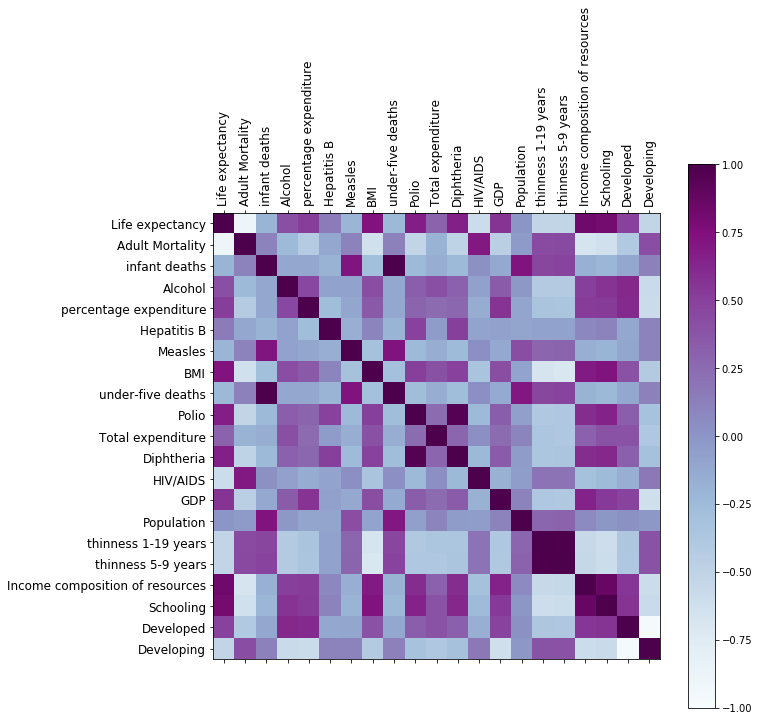

In [50]:
# Plot the correlation map
plot_corr_map(life_expectancy.drop(['Continent', 'id'], axis=1, inplace=False))

By looking at the above plot, we can easily identify the features that are highly correlated and those that are not. For example, 'under-five deaths' is highly correlated with 'infant deaths' which is obvious. Also 'Population' and 'infant death' are correlated. This sounds logic too. If we look at 'Life expectancy', we can see that it is correlated to 'GDP, 'BMI', 'Polio', 'Diphteria', 'Income composition of resources' and 'Schooling'.

### Distribution of relevant features

In [51]:
sns.set(style="white", palette="muted", color_codes=True)

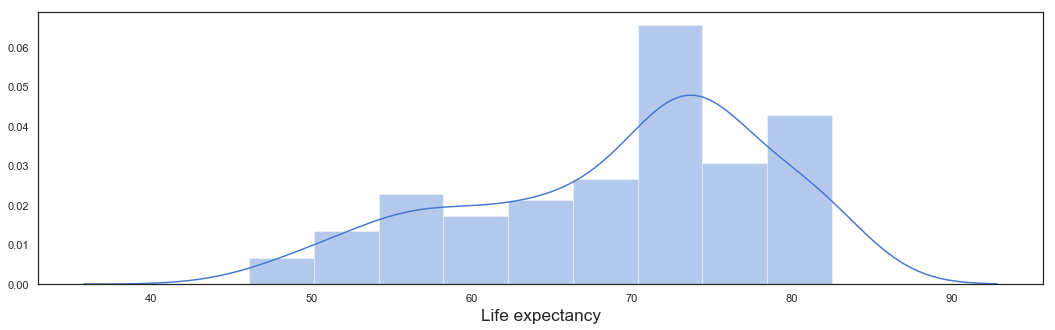

In [52]:
plot_dist(life_expectancy, 'Life expectancy')

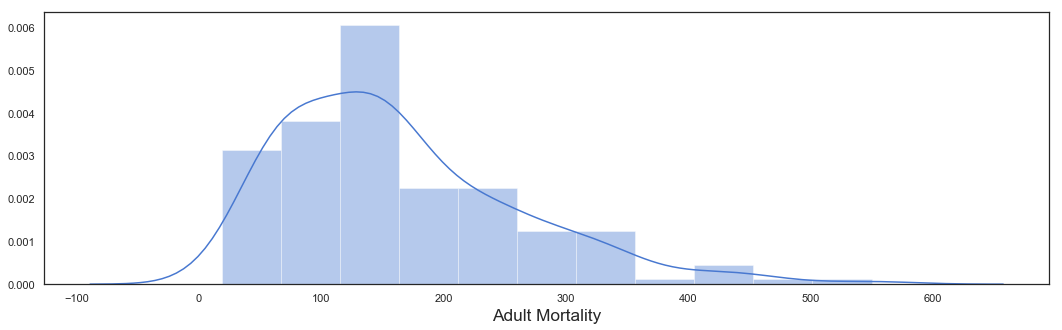

In [53]:
plot_dist(life_expectancy, 'Adult Mortality')

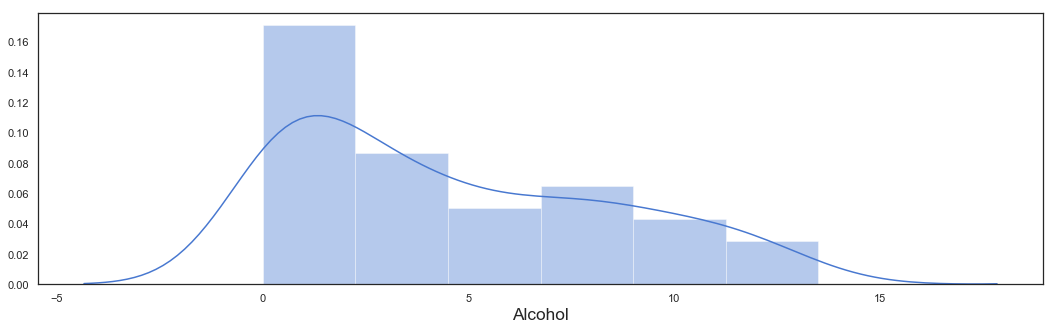

In [54]:
plot_dist(life_expectancy, 'Alcohol')

### Continent analysis

We plot relevant features that could help us separate the continents. We start by Life expectancy versus the GDP per capita in USD. We can clearly see the trend for Europe and Africa, with Asia in between.

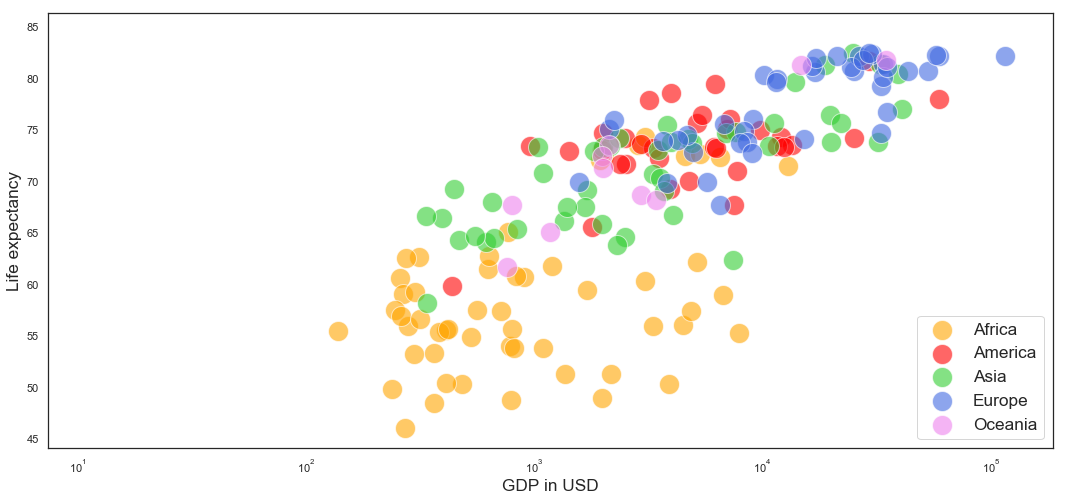

In [55]:
# Scatter plot of GDP vs Life expectancy
scatter_x = life_expectancy['GDP'].values
scatter_y = life_expectancy['Life expectancy'].values
scatter_plot(life_expectancy, scatter_x, scatter_y, 'GDP in USD', 'Life expectancy', x_log=True)

Here we plot the HIV/AIDS versus the adult mortality. Here again we can cleary see the trends for Africa, America and Europe.

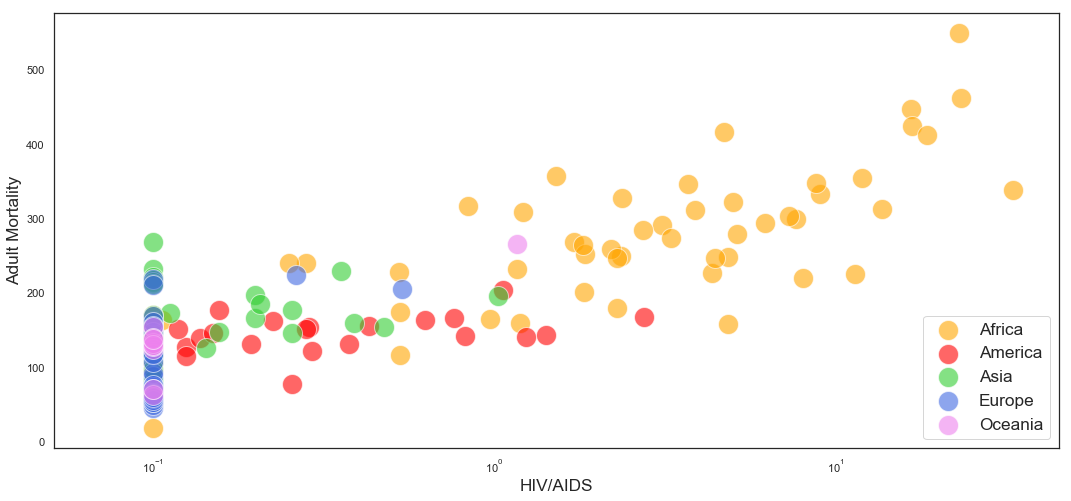

In [56]:
# Scatter plot of HIV/AIDS vs Adult Mortality
scatter_x = life_expectancy['HIV/AIDS'].values
scatter_y = life_expectancy['Adult Mortality'].values
scatter_plot(life_expectancy, scatter_x, scatter_y, 'HIV/AIDS', 'Adult Mortality', x_log=True)

We plot the schooling versus the life expectation. As the 2 plots above we get the same trends.

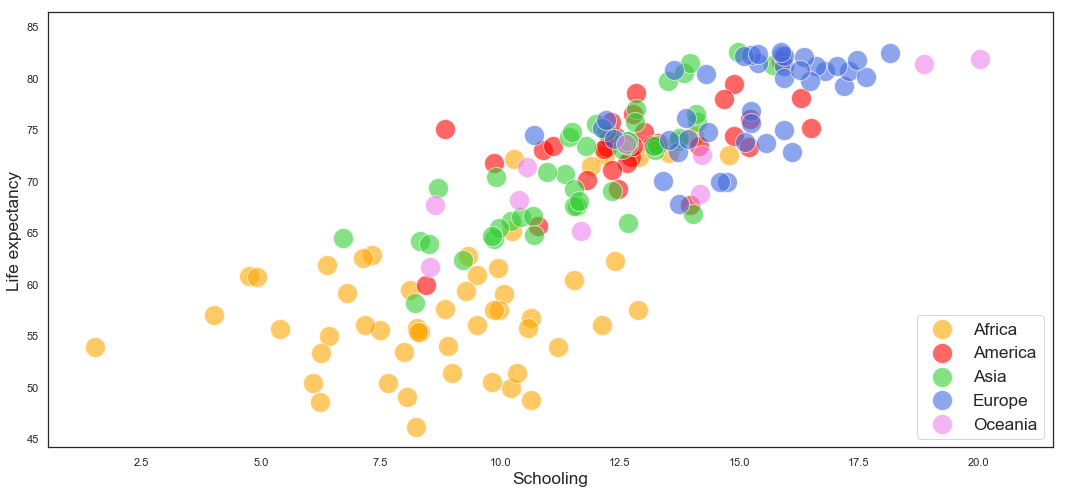

In [57]:
# Scatter plot of HIV/AIDS vs Adult Mortality
scatter_x = life_expectancy['Schooling'].values
scatter_y = life_expectancy['Life expectancy'].values
scatter_plot(life_expectancy, scatter_x, scatter_y, 'Schooling', 'Life expectancy')

## Predict expectancy

Now that we have a better view on our data, we will try to find a good model to predict the life expectancy and thus see the importance of each feature in the life exectancy of the countries.

### Prepare the data

In [58]:
# Remove columns continent and id
life_expectancy_ = life_expectancy.drop(['Continent', 'id'], axis=1)

In [59]:
# Separate the targets and the features
y = life_expectancy_['Life expectancy'].values
X = life_expectancy_.drop('Life expectancy', axis=1).values
# Split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Test the models

#### Linear Regression

We start with a simple linear regression.

In [60]:
# Define the LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
# Get the predictions
y_pred = lin_reg.predict(X_test)

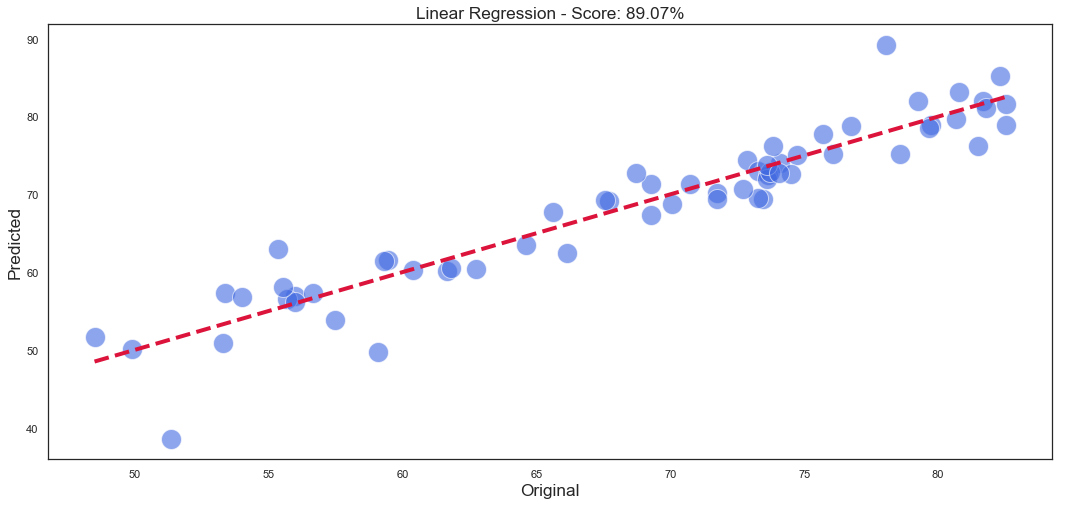

In [61]:
# Plot the result
plot_pred(y_test, y_pred, 'Linear Regression', r2_score(y_pred, y_test))

#### Ridge Regression

We continue with ridge regression.

In [62]:
# Define a list of parameters to test
grid = [{'alpha': [1, 10, 100, 1000, 10000],
        'tol': [1e-2, 1e-3, 1e-4, 1e-5]}]

In [63]:
# Apply the parameters to RidgeRegression to get the best model
reg = GridSearchCV(Ridge(random_state=42), grid, n_jobs=-1, cv=5, iid=False)
reg.fit(X_train, y_train)
best_model_ridge = reg.best_estimator_
# Get the predictions using the best model
y_pred = best_model_ridge.predict(X_test)

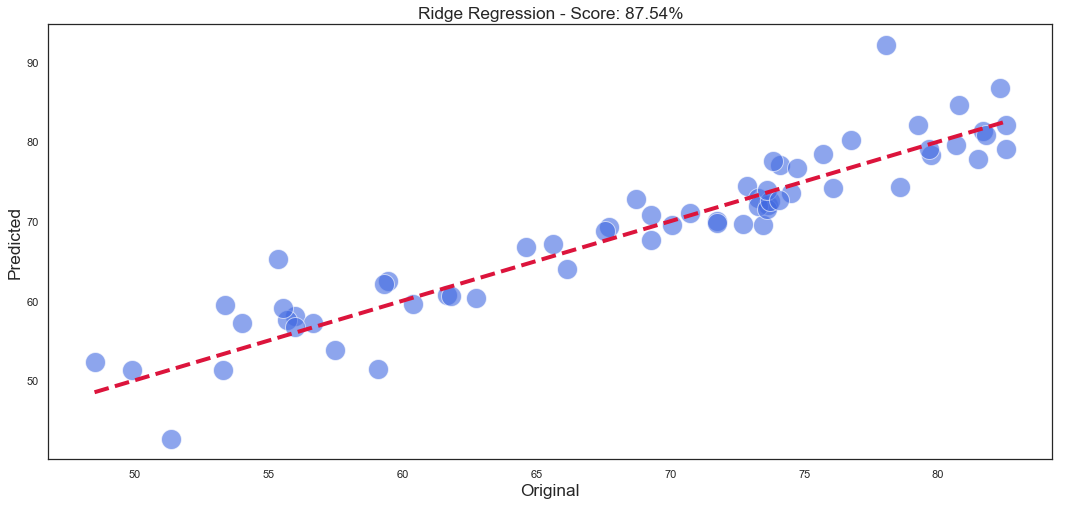

In [64]:
# Plot the results
plot_pred(y_test, y_pred, 'Ridge Regression', r2_score(y_pred, y_test))

#### Lasso

We now try Lasso.

In [65]:
# Define a list of parameters to test
grid = [{'alpha': [0.0001, 0.001, 0.01, 1, 10, 100, 1000],
         'tol': [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]}]

In [66]:
# Apply the parameters to LinearSVR to get the best model
reg = GridSearchCV(Lasso(random_state=42, max_iter=1e5), grid, n_jobs=-1, cv=5, iid=True)
reg.fit(X_train, y_train)
best_model_lasso = reg.best_estimator_
# Get the predictions using the best model
y_pred = best_model_lasso.predict(X_test)

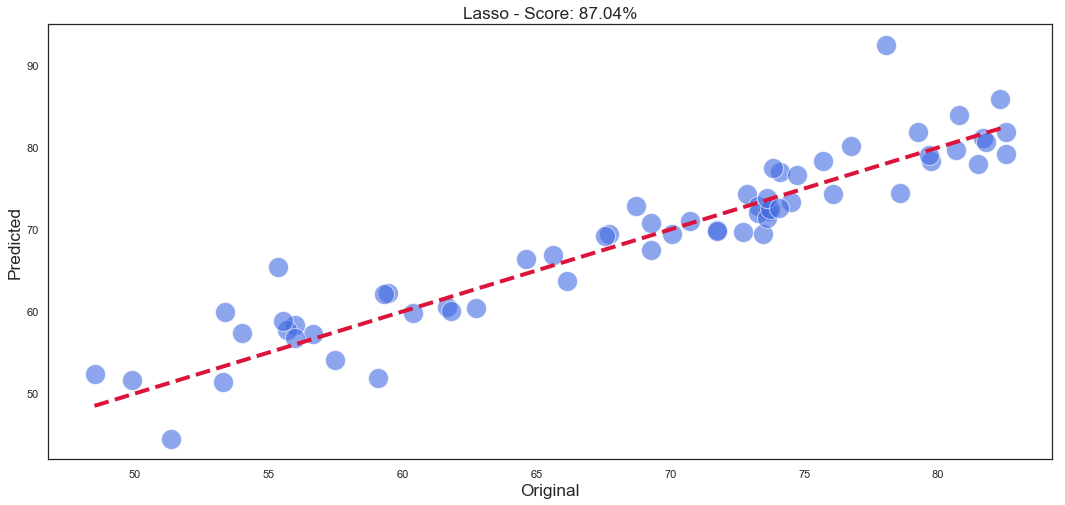

In [67]:
# Plot the result
plot_pred(y_test, y_pred, 'Lasso', r2_score(y_test, y_pred))

It seems we have a relatively good models.

### Coefficients analysis

We will now analyze the features' coefficient.

In [68]:
# Get the weights and the features
weights_lin = lin_reg.coef_
weights_ridge = best_model_ridge.coef_
weights_lasso = best_model_lasso.coef_
features = life_expectancy.columns[1:]

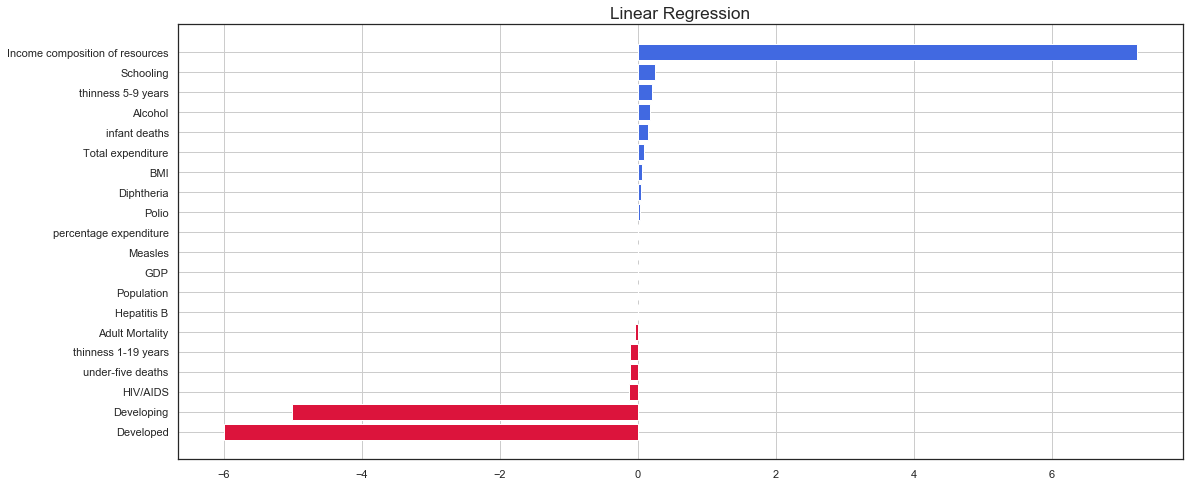

In [69]:
# Plot the result for Linear Regression
plot_features_coefs(features, weights_lin, 'Linear Regression')

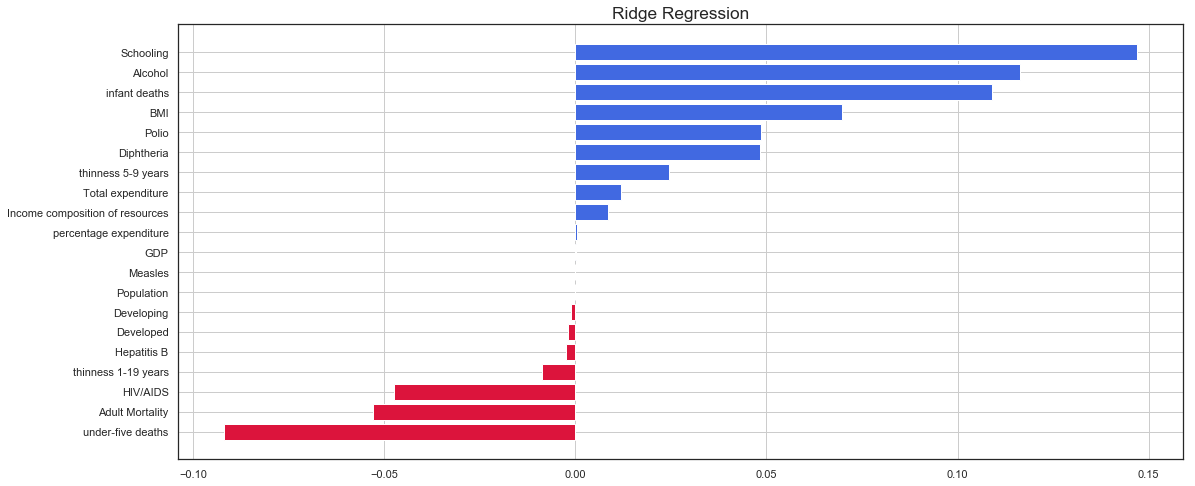

In [70]:
# Plot the result for Ridge Regression
plot_features_coefs(features, weights_ridge, 'Ridge Regression')

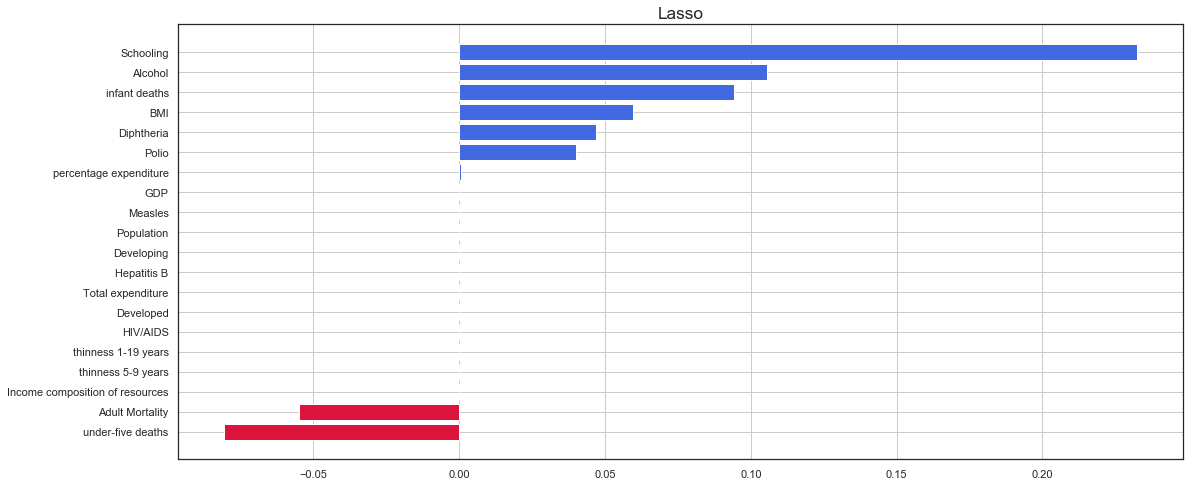

In [71]:
# Plot the result for Lasso
plot_features_coefs(features, weights_lasso, 'Lasso')

### Update features' values and predict the new life expectancy

From the above plots, we can see that some features have higher weights than others and that some are positively/negatively correlated. This means that a small increase/decrease of theses features could lead to an increase in the life expectancy. Lets check this assumption by applying increases to those features for the countries that have a life expectancy below a given threshold.

In [82]:
# Define the dictionary of improvement values by features
values = np.arange(0, 1, 0.01)
dict_impr = {'BMI': values, 'Polio': values, 'Diphtheria': values,
             'HIV/AIDS': -values, 'Hepatitis B': -values}
# Define the threshold
threshold = 64
# Define the best model to use
model = best_model_ridge
# Get indices of countries where original life expectancy was below threshold
indices = life_expectancy[life_expectancy['Life expectancy'] < threshold].index
# Get the results for each feature updated independently
averages, nb_countries = get_life_exp_pred_results(life_expectancy, dict_impr, indices, threshold, model)
# Get the results for the combination of all features
avg_all_combined, nb_countries_all_combined = [], []
for i in values:
    updated_df = update_feature(life_expectancy, 'BMI', i, threshold)
    updated_df = update_feature(updated_df, 'Polio', i, threshold)
    updated_df = update_feature(updated_df, 'Diphtheria', i, threshold)
    updated_df = update_feature(updated_df, 'HIV/AIDS', -i, threshold)
    updated_df = update_feature(updated_df, 'Hepatitis B', -i, threshold)
    predicted_df = predict_new_le(updated_df, threshold, model)
    life_exp = predicted_df.loc[indices]
    avg_all_combined.append(np.mean(life_exp['Life expectancy'].values))
    nb_countries_all_combined.append(life_exp[life_exp['Life expectancy'] >= threshold].shape[0])

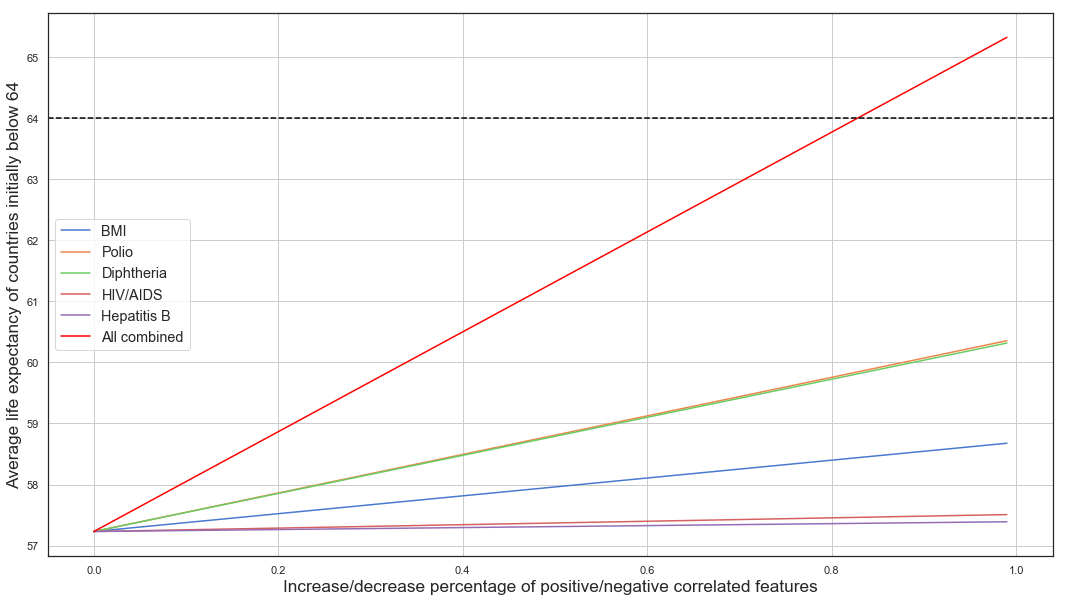

In [87]:
# Plot the result for average updated life expectancy
for i, key in enumerate(dict_impr):
    plt.plot(values, averages[i], label=key)
plt.plot(values, avg_all_combined, label='All combined', c='red')
plt.xlabel('Increase/decrease percentage of positive/negative correlated features', fontsize='x-large')
plt.ylabel('Average life expectancy of countries initially below {}'.format(threshold), fontsize='x-large')
plt.gcf().set_size_inches(18, 10)
plt.axhline(y=threshold, linestyle='--', c='black')
plt.grid()
plt.legend(fontsize='large')
plt.show()

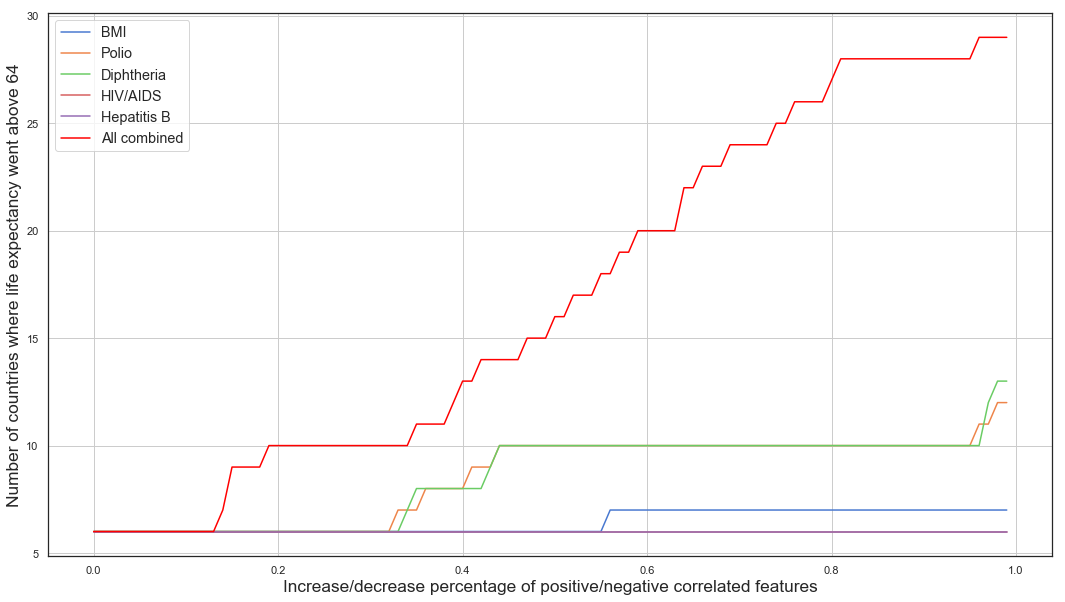

In [84]:
# Plot the result for the number of countries that passed above the threshold
for i, key in enumerate(dict_impr):
    plt.plot(values, nb_countries[i], label=key)
plt.plot(values, nb_countries_all_combined, label='All combined', c='red')
plt.xlabel('Increase/decrease percentage of positive/negative correlated features', fontsize='x-large')
plt.ylabel('Number of countries where life expectancy went above {}'.format(threshold), fontsize='x-large')
plt.gcf().set_size_inches(18, 10)
plt.grid()
plt.legend(fontsize='large')
plt.show()

Let's give an analysis of the coefficients: The coefficients of all the continents except Europe and Africa are positive. This tells us there is a positive correlation between the life expectancy and living in America for example. This tells us that in average you live a less amount of time if you live in Africa. 

Something weird: There is a negative correlation between life expectancy and living in a developed country as well as in a developing country. The two coefficients are quite close also. 


Income composition of ressources and schooling are two features that are positively correlated with the life expectancy. Thus our model tells us that it would be interesting to work on those feature to improve the life expectancy. Schooling can be a relatively easy feature to work on, however income composition of ressource is not. It is an index that takes into account a lot of parameters. Hence it is not very interesting to say that we will work on it. 

Thinness 5-9 years old is strongly negatvely correlated with the life expectancy. 

Something weird: Infant death is positively correlated with life expectancy ...

**We will now do feature elimination in order to keep the significant ones.**

In [342]:
estimator = reg
selector = RFE(estimator, 5, step = 1)

In [ ]:
selector = selector.fit(X_train, y_train)
selector.support_

In [ ]:
selector.ranking_